# 1. 요약 : 절차
  
## 1.1. 계획
  - 사진 찍는 걸 좋아하지 않음
    - "내가 좋아하는 연예인과 그를 닮은 연예인을 찾아보자"
    
  - 좋아하는 연예인 : 가수 김광석
    - "가수 김광석"의 서로 다른 이미지로 닮은 연예인을 찾기로 계획
    - 이미지에서 시선, 나이에 따른 변화가 있는 이미지 : 4개
    
  - 남자 연예인과 비교
    - 이미지 4개에 대한 결과로 같은 연예인이 뽑힐 수 있을까
    

## 1.2. 데이터 준비
  - 가수 김광석 이미지
    - 구글에서 검색
    - kim 폴더에 저장
    - 이미지 불러내어 얼굴영역 그려봄

  - 남자 연예인 이미지 
    - 슬랙에 올라온 이미지로 비교하기로 함
    - actors_images 폴더에 저장
    - 이미지 불러내어 얼굴영역 그려봄
    
  - 가수 김광석 이미지와 남자 연예인 이미지를 각각 처리해서 저장해야함
    - 경로설정, imbedding vector : 별도 변수 지정
    
  - 이미지 처리 시 얼굴 영역이 확보되지 않는 이미지 처리
  
  - 파일명 분할하여 이미지 이름으로 지정  
    

## 1.3. 거리 측정 / 비교
  - 2개의 이미지를 인자로 전달받아 거리 비교
  
  - 가까운 이미지 3개를 확보
    - 해당 이미지의 연예인 이름을 리스트로 작성
    - 결과물 출력시 비교사진으로 표현
    
  - 결과
    - 가수 김광석 닮은 연예인 3위까지 표시
      - 거리가 모두 0.5 이하로 나타남
    - 가수 김광석과 연예인 이미지로 나타냄


# 2. 회고

  - 이미지 변화에 따른 닮은 연예인도 달라짐
    - 시선과 표정에 따라서 조금씩 변화
    - 중복되는 연예인은 1명 : 연예인 김영호
   
  - embedding vector로 표현되지 않는 이미지 존재 : 삭제
      
  - 한 이미지와 여러 이미지를 비교하는 것이 아니라 코딩을 수정함
  
  - sorted_faces = sorted(actors_dict.items(), key=lambda x:sort_key_func(x[0]))
    - 이렇게 나타낼 수 있다는 것에 놀람
    - 이렇게 표현할 수 있는 수준이 될려면 얼마나 노력해야 할까 생각해봄
    
  - 급하게 향상되는 실력보다 조금씩 쌓아가는 노력이 필요하다고 생각하지만 부러운 건 어쩔 수 없음
    - 다시 한 번 열심히 노력하자고 각오


[(116, 322, 270, 167)]


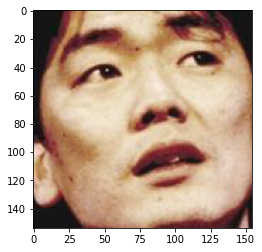

In [1]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/work/project/pro_07_embedding/kim/김광석03.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력합니/다.

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)   # 이미지에서 얼굴영역만 잘라낸 cropped_face를 그려 봅니다.

In [2]:
import face_recognition
import os

def get_gropped_face(image_path):
    # jjang
    image = face_recognition.load_image_file(image_path)
    face_locations = face_recognition.face_locations(image)
    
#    print(face_locations[1])

    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

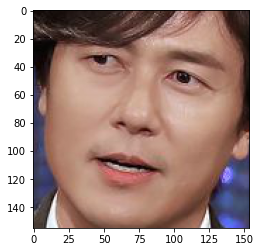

In [3]:
image_path = os.getenv('HOME')+'/work/project/pro_07_embedding/actors_images/' + '감우성.jpeg'

cropped_face = get_gropped_face(image_path)
plt.imshow(cropped_face)

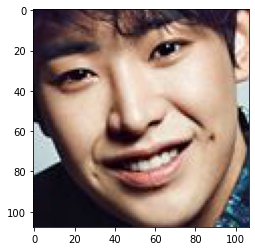

In [4]:
#jjang

image_path = os.getenv('HOME')+'/work/project/pro_07_embedding/actors_images/'

file_list = os.listdir(image_path)
file_list = list(file_list)

for i in range(1, len(file_list)-1):
    cropped_face = get_gropped_face(image_path + file_list[i])
    plt.imshow(cropped_face)

#jjang
# file_list = os.listdir(image_path)
# print(file_list)

# for file in file_list:
#     path = image_path + file
#     cropped_face = get_gropped_face(path)
#     plt.imshow(cropped_face)

In [5]:
import os

kim_path = os.getenv('HOME')+'/work/project/pro_07_embedding/kim'
actors_path = os.getenv('HOME')+'/work/project/pro_07_embedding/actors_images'

file_kim_list = os.listdir(kim_path)
file_actors_list = os.listdir(actors_path)

# print ("file_kim_list: {}".format(file_kim_list))
# print("file_actors_list: {}".format(file_actors_list))
print(len(file_actors_list))

374


In [6]:
image_file = os.path.join(kim_path, '김광석01.jpg')

print(image_file)  #jjang

face = get_gropped_face(image_file)   # 얼굴 영역을 구하는 함수(이전 스텝에서 구현)

# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)  
embedding

/home/aiffel/work/project/pro_07_embedding/kim/김광석01.jpg


[array([-0.06004554,  0.09805094,  0.05312868, -0.00200664, -0.00205498,
        -0.06848565, -0.03367385, -0.11515882,  0.10942037, -0.07629128,
         0.23601536, -0.03004887, -0.16206579, -0.10773919, -0.01763629,
         0.17951594, -0.22532143, -0.09692959, -0.0782029 ,  0.03428969,
         0.10266607,  0.02635143,  0.06467085, -0.02513024, -0.02374422,
        -0.36281589, -0.10696886, -0.07529909,  0.07611308, -0.03347925,
        -0.06673697, -0.04373149, -0.19244826, -0.07820666,  0.05146884,
        -0.00627402, -0.04709583, -0.07030969,  0.20066932,  0.00607432,
        -0.24052814,  0.05401168,  0.0511593 ,  0.20576252,  0.23868065,
         0.03640972,  0.01599474, -0.18283834,  0.12157145, -0.17745078,
         0.01666118,  0.13579811,  0.06216873,  0.09736946, -0.0270036 ,
        -0.03800911,  0.02111148,  0.12019199, -0.15025966,  0.03823192,
         0.13632457, -0.09759022, -0.04752522, -0.01567204,  0.18626295,
         0.07124327, -0.14837688, -0.20183712,  0.0

In [7]:
actors_list = []  #jjang
kim_list = []

def get_face_embedding_dict(dir_path, list):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        # jjang
        img_path = os.path.join(dir_path, file)
        
#        print(img_path)  #jjang
        
        face = get_gropped_face(img_path)
        embedding = get_face_embedding(face)
        
#        actors_list.append(os.path.splitext(file)[0])  #jjang
        list.append(os.path.splitext(file)[0])  #jjang
        
        embedding_dict[os.path.splitext(file)[0]] = embedding[0]
  
    return embedding_dict

In [8]:
kim_dict = get_face_embedding_dict(kim_path, kim_list)
kim_dict['김광석01']

array([-0.06004554,  0.09805094,  0.05312868, -0.00200664, -0.00205498,
       -0.06848565, -0.03367385, -0.11515882,  0.10942037, -0.07629128,
        0.23601536, -0.03004887, -0.16206579, -0.10773919, -0.01763629,
        0.17951594, -0.22532143, -0.09692959, -0.0782029 ,  0.03428969,
        0.10266607,  0.02635143,  0.06467085, -0.02513024, -0.02374422,
       -0.36281589, -0.10696886, -0.07529909,  0.07611308, -0.03347925,
       -0.06673697, -0.04373149, -0.19244826, -0.07820666,  0.05146884,
       -0.00627402, -0.04709583, -0.07030969,  0.20066932,  0.00607432,
       -0.24052814,  0.05401168,  0.0511593 ,  0.20576252,  0.23868065,
        0.03640972,  0.01599474, -0.18283834,  0.12157145, -0.17745078,
        0.01666118,  0.13579811,  0.06216873,  0.09736946, -0.0270036 ,
       -0.03800911,  0.02111148,  0.12019199, -0.15025966,  0.03823192,
        0.13632457, -0.09759022, -0.04752522, -0.01567204,  0.18626295,
        0.07124327, -0.14837688, -0.20183712,  0.08781887, -0.16

In [9]:
actors_dict = get_face_embedding_dict(actors_path, actors_list)
actors_dict['이희도']

array([-0.03495726,  0.03395097,  0.06638105,  0.03292162, -0.01713871,
       -0.07470937, -0.078849  , -0.1684887 ,  0.08664081, -0.119977  ,
        0.21574844, -0.07611321, -0.19350283, -0.07414317, -0.02243119,
        0.15376523, -0.1392989 , -0.07271837, -0.11735498, -0.00510462,
        0.02310286, -0.04335736,  0.05437978, -0.02878259, -0.02625664,
       -0.30677202, -0.13787884, -0.08420035,  0.00954767, -0.02119603,
       -0.09589312, -0.01822306, -0.17070411, -0.03570084,  0.02652666,
        0.03922979, -0.03138278, -0.05187722,  0.238166  , -0.03407333,
       -0.19684911,  0.03880407,  0.04369288,  0.17048888,  0.19982494,
        0.00506433,  0.01438131, -0.13398416,  0.13517599, -0.1655743 ,
        0.0562598 ,  0.14435218,  0.09967029,  0.13416873, -0.02348341,
       -0.10618072,  0.060048  ,  0.1508169 , -0.12361479,  0.00781095,
        0.15886837, -0.09023464, -0.07268144,  0.01546632,  0.23942085,
        0.17115039, -0.12750791, -0.22061312,  0.05162389, -0.15

In [10]:
#actors_list

In [41]:
import numpy as np
import cv2

In [42]:
def get_distance(name1, name2):
    return np.linalg.norm(np.array(kim_dict[name1])-np.array(actors_dict[name2]), ord=2)

In [13]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.
def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1


In [50]:
#p_name = []

def get_nearest_face(name, top=3):
    p_n = []

    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(actors_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('{} 순위 {} : 이름({}), 거리({})'.format(name, i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            
            p = './actors_images/' + sorted_faces[i][0] + '.jpeg'
            p_n.append(p)
    return p_n


In [51]:
kim_dict.keys()

dict_keys(['김광석02', '김광석03', '김광석01', '김광석04'])

In [52]:
kim_list

['김광석02', '김광석03', '김광석01', '김광석04']

In [53]:
def nearest_actor(name):
    p_name = get_nearest_face(name)
    
    kim_p = './kim/' + name + '.jpg'
    
    img1 = cv2.imread(kim_p)
    img2 = cv2.imread(p_name[0])
    img3 = cv2.imread(p_name[1])
    img4 = cv2.imread(p_name[2])

    plt.subplot(2, 2, 1)
    plt.imshow(img1)

    plt.subplot(2, 2, 2)
    plt.imshow(img2)

    plt.subplot(2, 2, 3)
    plt.imshow(img3)

    plt.subplot(2, 2, 4)
    plt.imshow(img4)

    plt.show()
    

김광석02 순위 1 : 이름(김영호), 거리(0.41936092264177804)
김광석02 순위 2 : 이름(안세하), 거리(0.43167838483386944)
김광석02 순위 3 : 이름(이원종), 거리(0.4328602717581541)


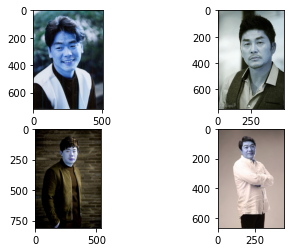

김광석03 순위 1 : 이름(박상면), 거리(0.4162560517841763)
김광석03 순위 2 : 이름(권혁수), 거리(0.4185328518368687)
김광석03 순위 3 : 이름(이계인), 거리(0.41905528852486806)


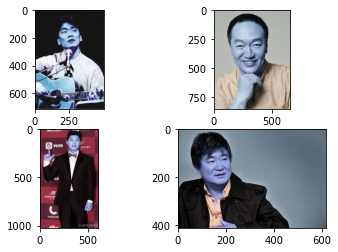

김광석01 순위 1 : 이름(이수완), 거리(0.4208671213104709)
김광석01 순위 2 : 이름(성동일), 거리(0.4264278654066088)
김광석01 순위 3 : 이름(이효정), 거리(0.4477992850089778)


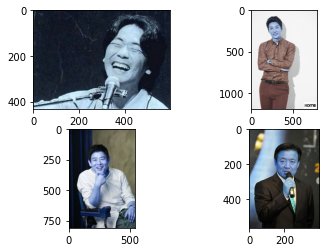

김광석04 순위 1 : 이름(심희섭), 거리(0.4205832327581957)
김광석04 순위 2 : 이름(이태성), 거리(0.4237333663404427)
김광석04 순위 3 : 이름(김영호), 거리(0.4240981253481143)


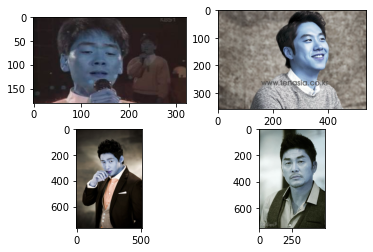

In [54]:
for kim in kim_list:
    nearest_actor(kim)